<a href="https://colab.research.google.com/github/aqqua23/class2021Fall/blob/main/nlp%20%ED%95%84%EA%B8%B02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**2021-12-01**

### Tokenization

In [1]:
import nltk

In [2]:
text = 'Here’s to the crazy ones, the misfits, the rebels, the troublemakers, the round pegs in the square holes. \
The ones who see things differently — they’re not fond of rules. \
You can quote them, disagree with them, glorify or vilify them, \
but the only thing you can’t do is ignore them because they change things. \
They push the human race forward, and while some may see them as the crazy ones, we see genius, \
because the ones who are crazy enough to think that they can change the world, are the ones who do.'

In [ ]:
text.split()

In [ ]:
' '.join(text.split())

In [5]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')
words = word_tokenize(text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [6]:
from nltk.tokenize import RegexpTokenizer
retokenize = RegexpTokenizer("[\w]+")
words = retokenize.tokenize(text)

### Normalization  
Stemming: am → am, the going → the go, having → hav  
Lemmatization: am → be, the going → the going, having → have

In [ ]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
[stemmer.stem(w) for w in words]

In [ ]:
from nltk.stem import LancasterStemmer
stemmer = LancasterStemmer()
[stemmer.stem(w) for w in words]

In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
[lemmatizer.lemmatize(w) for w in words]

### Stopword

In [ ]:
from nltk.corpus import stopwords  
nltk.download('stopwords')
print(words)
words = [w for w in words if not w in stopwords.words('english')]
print(words)

### Collocation, Concordance

retokenize - regular * tokenize

In [11]:
nltk.download('gutenberg')
text = nltk.corpus.gutenberg.raw('austen-emma.txt')
words = retokenize.tokenize(text)

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


In [ ]:
text

collocations - 자주 일어나는 두 단어 (아래의 경우엔 이름이나 지명이 많이 나타남)

In [ ]:
nltk.Text(words).collocations()

In [14]:
nltk.Text(words).concordance('Emma', 79, 10)

Displaying 10 of 865 matches:
                                     Emma by Jane Austen 1816 VOLUME I CHAPTER
                                     Emma Woodhouse handsome clever and rich w
f both daughters but particularly of Emma Between _them_ it was more the intim
nd friend very mutually attached and Emma doing just what she liked highly est
 by her own The real evils indeed of Emma s situation were the power of having
ding day of this beloved friend that Emma first sat in mournful thought of any
going only half a mile from them but Emma was aware that great must be the dif
a day It was a melancholy change and Emma could not but sigh over it and wish 
ll the rest of her life at Hartfield Emma smiled and chatted as cheerfully as 
l be able to tell her how we all are Emma spared no exertions to maintain this


이 소설 속에서 해당 단어가 얼마나 퍼져 있는지를 알아보기 위한 구문

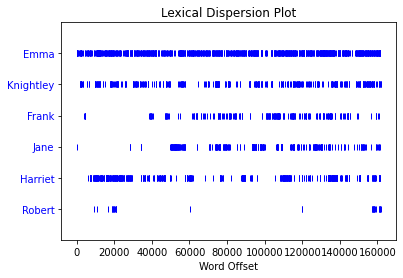

In [15]:
nltk.Text(words).dispersion_plot(["Emma", "Knightley", "Frank", "Jane", "Harriet", "Robert"])

In [16]:
nltk.Text(words).similar("Emma")

she it he i harriet you her jane him that me and all they them herself
there but be isabella


엠마와 she가 비슷한 context에 나올때 나타나게 하는 것

In [17]:
nltk.Text(words).common_contexts(["Emma", "she"])

but_was and_could that_should said_and which_could whom_knew
which_particularly and_imagined that_could said_i that_began
and_thought do_was but_could than_had said_but manner_was this_could
as_saw possible_could


### Frequency distribution, Frequency plot

In [22]:
fd = nltk.FreqDist(words).most_common(20)
fd

[('to', 5183),
 ('the', 4844),
 ('and', 4672),
 ('of', 4279),
 ('I', 3178),
 ('a', 3004),
 ('was', 2385),
 ('her', 2381),
 ('it', 2128),
 ('in', 2118),
 ('not', 2101),
 ('be', 1970),
 ('she', 1778),
 ('that', 1730),
 ('you', 1677),
 ('had', 1606),
 ('as', 1387),
 ('he', 1365),
 ('for', 1321),
 ('have', 1301)]

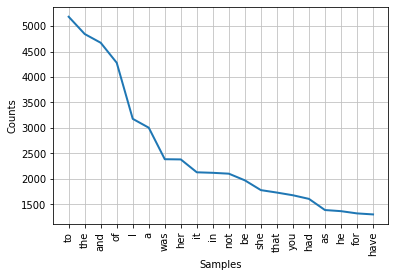

In [23]:
nltk.Text(words).plot(20)

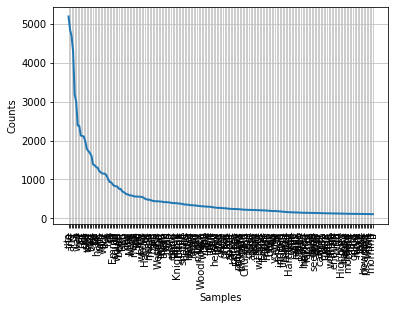

In [24]:
nltk.Text(words).plot(200)

로그함수에서 y와 x축이 바뀐 형태의 모습임

### Dictionary

nltk는 다양한 딕셔너리를 제공한다.

In [25]:
nltk.download('words')
nltk.corpus.words.words('en')[-20:-1]


[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


['zymosis',
 'zymosterol',
 'zymosthenic',
 'zymotechnic',
 'zymotechnical',
 'zymotechnics',
 'zymotechny',
 'zymotic',
 'zymotically',
 'zymotize',
 'zymotoxic',
 'zymurgy',
 'Zyrenian',
 'Zyrian',
 'Zyryan',
 'zythem',
 'Zythia',
 'zythum',
 'Zyzomys']

In [26]:
len(nltk.corpus.words.words('en'))

235886

### Regular expression

In [27]:
import re

In [ ]:
'''       Basic Regular Expression Meta-Characters, Including Wildcards, Ranges and Closures

.	        Wildcard, matches any character
^abc	    Matches some pattern abc at the start of a string
abc$	    Matches some pattern abc at the end of a string   #제일 마지막에서 ed를 찾아라
[abc]	    Matches one of a set of characters
[^abc]    Matches anything but a set of characters
[A-Z0-9]	Matches one of a range of characters
ed|ing|s	Matches one of the specified strings (disjunction)
*	        Zero or more of previous item, e.g. a*, [a-z]* (also known as Kleene Closure)
+	        One or more of previous item, e.g. a+, [a-z]+
?	        Zero or one of the previous item (i.e. optional), e.g. a?, [a-z]?
{n}	      Exactly n repeats where n is a non-negative integer
{n,}	    At least n repeats
{,n}	    No more than n repeats
{m,n}	    At least m and no more than n repeats
a(b|c)+	  Parentheses that indicate the scope of the operators
(...)     Matches whatever regular expression is inside the parentheses
\d
Matches any decimal digit; this is equivalent to the class [0-9].
\D
Matches any non-digit character; this is equivalent to the class [^0-9].
\s
Matches any whitespace character; this is equivalent to the class [ \t\n\r\f\v].
\S
Matches any non-whitespace character; this is equivalent to the class [^ \t\n\r\f\v].
\w
Matches any alphanumeric character; this is equivalent to the class [a-zA-Z0-9_].
\W
Matches any non-alphanumeric character; this is equivalent to the class [^a-zA-Z0-9_].

'''

In [29]:
engdict = nltk.corpus.words.words('en')

result = [w for w in engdict if re.search('ed$', w)]
# result = [w for w in engdict if re.search('^..j..t..$', w)]
# result = [w for w in engdict if re.search('^[ghi][mno][jlk][def]$', w)]
# result = [w for w in engdict if re.search('^[ah]+$', w)][:10]
print(result[:10])

['abaissed', 'abandoned', 'abased', 'abashed', 'abatised', 'abed', 'aborted', 'abridged', 'abscessed', 'absconded']


In [30]:
nltk.download('treebank')
wsj = nltk.corpus.treebank.words()

# result = [w for w in wsj if re.search('(ed|ing)$', w)]
# result = [w for w in wsj if re.search('^[0-9]+\.[0-9]+$', w)]
# result = [w for w in wsj if re.search('^[A-Z]+\$$', w)]
# result = [w for w in wsj if re.search('^[0-9]{4}$', w)]
# result = [w for w in wsj if re.search('^[0-9]+-[a-z]{3,5}$', w)]
# result = [w for w in wsj if re.search('^[a-z]{5,}-[a-z]{2,3}-[a-z]{,6}$', w)]

result = sorted(set(result))
print(result[:10])

[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.
['Ahmed', 'Alfred', 'Arided', 'Christed', 'Confed', 'Daneweed', 'Eldred', 'Eskimoized', 'Fred', 'Ged']


### Extract information (pos tag, named entity)

In [31]:
sent = "I am Jhon from America and would like to go to Starbuck"
words = nltk.word_tokenize(sent)

In [ ]:
'''
POS tag list:

CC	coordinating conjunction
CD	cardinal digit
DT	determiner
EX	existential there (like: "there is" ... think of it like "there exists")
FW	foreign word
IN	preposition/subordinating conjunction
JJ	adjective	'big'
JJR	adjective, comparative	'bigger'
JJS	adjective, superlative	'biggest'
LS	list marker	1)
MD	modal	could, will
NN	noun, singular 'desk'
NNS	noun plural	'desks'
NNP	proper noun, singular	'Harrison'
NNPS	proper noun, plural	'Americans'
PDT	predeterminer	'all the kids'
POS	possessive ending	parent's
PRP	personal pronoun	I, he, she
PRP$	possessive pronoun	my, his, hers
RB	adverb	very, silently,
RBR	adverb, comparative	better
RBS	adverb, superlative	best
RP	particle	give up
TO	to	go 'to' the store.
UH	interjection	errrrrrrrm
VB	verb, base form	take
VBD	verb, past tense	took
VBG	verb, gerund/present participle	taking
VBN	verb, past participle	taken
VBP	verb, sing. present, non-3d	take
VBZ	verb, 3rd person sing. present	takes
WDT	wh-determiner	which
WP	wh-pronoun	who, what
WP$	possessive wh-pronoun	whose
WRB	wh-abverb	where, when
'''

In [33]:
nltk.download('averaged_perceptron_tagger')
pos = nltk.pos_tag(words)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [34]:
nltk.download('maxent_ne_chunker')
NE = nltk.ne_chunk(pos)
# common Entity types: ORGANIZATION, PERSON, LOCATION, DATE, TIME, MONEY, and GPE (geo-political entity)

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.


ne = named entity

### Wordcloud

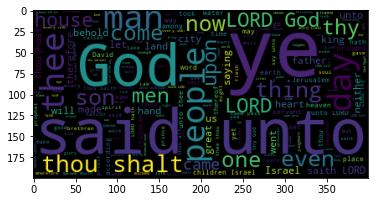

In [35]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

text = nltk.corpus.gutenberg.raw('bible-kjv.txt')

wc = WordCloud().generate(text) 
plt.imshow(wc)

어떤 단어들은 너무 자주 쓰이니까 그건 빼고 싶을 경우에 STOPWORDS를 사용함

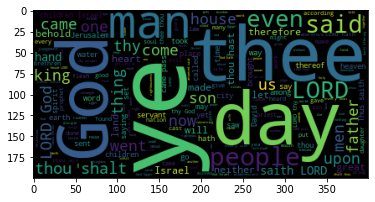

In [36]:
stopwords = set(STOPWORDS) 
stopwords.add('unto')
wc = WordCloud(stopwords = stopwords).generate(text) 
plt.imshow(wc)